In [1]:

######## snakemake preamble start (automatically inserted, do not edit) ########
import sys; sys.path.extend(['/home/nate/miniforge3/envs/wnv/lib/python3.10/site-packages', '/home/nate/.cache/snakemake/snakemake/source-cache/runtime-cache/tmp4ub93gxs/file/home/nate/analysis/2022-10-10_wnv/workflow/rules/../notebooks', '/home/nate/analysis/2022-10-10_wnv/workflow/rules/../notebooks']); import pickle; snakemake = pickle.loads(b"\x80\x04\x95\x06\x05\x00\x00\x00\x00\x00\x00\x8c\x10snakemake.script\x94\x8c\tSnakemake\x94\x93\x94)\x81\x94}\x94(\x8c\x05input\x94\x8c\x0csnakemake.io\x94\x8c\nInputFiles\x94\x93\x94)\x81\x94\x8cKbeast_runs/discrete/2023-03-24_wnv_skygrid_yearly_relaxed_discrete.mcc.tree\x94a}\x94(\x8c\x06_names\x94}\x94\x8c\x04tree\x94K\x00N\x86\x94s\x8c\x12_allowed_overrides\x94]\x94(\x8c\x05index\x94\x8c\x04sort\x94eh\x12\x8c\tfunctools\x94\x8c\x07partial\x94\x93\x94h\x06\x8c\x19Namedlist._used_attribute\x94\x93\x94\x85\x94R\x94(h\x18)}\x94\x8c\x05_name\x94h\x12sNt\x94bh\x13h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x13sNt\x94bh\x0eh\nub\x8c\x06output\x94h\x06\x8c\x0bOutputFiles\x94\x93\x94)\x81\x94(\x8c#analyses/plots/figureX_mcc-tree.pdf\x94\x8c*analyses/plots/figureX_mcc-tree-legend.pdf\x94e}\x94(h\x0c}\x94(\x8c\x0btree_figure\x94K\x00N\x86\x94\x8c\x0btree_legend\x94K\x01N\x86\x94uh\x10]\x94(h\x12h\x13eh\x12h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x12sNt\x94bh\x13h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x13sNt\x94bh*h&h,h'ub\x8c\x06params\x94h\x06\x8c\x06Params\x94\x93\x94)\x81\x94\x8c'res/shapefiles/cb_2018_us_state_20m.shp\x94a}\x94(h\x0c}\x94\x8c\x06us_map\x94K\x00N\x86\x94sh\x10]\x94(h\x12h\x13eh\x12h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x12sNt\x94bh\x13h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x13sNt\x94bh>h;ub\x8c\twildcards\x94h\x06\x8c\tWildcards\x94\x93\x94)\x81\x94}\x94(h\x0c}\x94h\x10]\x94(h\x12h\x13eh\x12h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x12sNt\x94bh\x13h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x13sNt\x94bub\x8c\x07threads\x94K\x01\x8c\tresources\x94h\x06\x8c\tResources\x94\x93\x94)\x81\x94(K\x01K\x01\x8c\x04/tmp\x94e}\x94(h\x0c}\x94(\x8c\x06_cores\x94K\x00N\x86\x94\x8c\x06_nodes\x94K\x01N\x86\x94\x8c\x06tmpdir\x94K\x02N\x86\x94uh\x10]\x94(h\x12h\x13eh\x12h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x12sNt\x94bh\x13h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x13sNt\x94bh`K\x01hbK\x01hdh]ub\x8c\x03log\x94h\x06\x8c\x03Log\x94\x93\x94)\x81\x94\x8c\x1fanalyses/figureX_mcc-tree.ipynb\x94a}\x94(h\x0c}\x94\x8c\x08notebook\x94K\x00N\x86\x94sh\x10]\x94(h\x12h\x13eh\x12h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x12sNt\x94bh\x13h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x13sNt\x94bhvhsub\x8c\x06config\x94}\x94\x8c\x04rule\x94\x8c\rplot_mcc_tree\x94\x8c\x0fbench_iteration\x94N\x8c\tscriptdir\x94\x8c>/home/nate/analysis/2022-10-10_wnv/workflow/rules/../notebooks\x94ub."); from snakemake.logging import logger; logger.printshellcmds = False; import os; os.chdir(r'/home/nate/analysis/2022-10-10_wnv');
######## snakemake preamble end #########


In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.colors as colors
from utils import setup_plotting_standards, dec_to_date, get_black
import baltic as bt
import geopandas as gpd

setup_plotting_standards()

COLOR = get_black()

### Figure X. Maximum clade credibility tree
Visualize the output MCC tree from our bayesian phylogeographic analysis.

Load the US shapefile. We'll color taxa by their longitude

In [3]:
us = gpd.read_file( snakemake.params.us_map )
us = us[["NAME", "geometry"]]
us = us.loc[~us["NAME"].isin(["Alaska", "Hawaii"])]
us = us.to_crs( "EPSG:2163" )
us["NAME"] = us["NAME"].str.replace( " ", "" )

# Calculate color for each state
us["longitude"] = us["geometry"].centroid.x
cNorm  = colors.Normalize( vmin=us["longitude"].min(), vmax=us["longitude"].max() )
smap_state = cm.ScalarMappable(norm=cNorm, cmap=cm.plasma )
us["color"] = us["longitude"].apply( smap_state.to_rgba )
us["color_hex"] = us["color"].apply( lambda x: "#{:02x}{:02x}{:02x}".format( int(x[0]*255), int(x[1]*255), int(x[2]*255)) )
state_dict = us.set_index("NAME")["color_hex"].to_dict()
state_dict["Other"] = "#A8A8A8"

Load the tree from file. I use baltic (H/t to @evogytis) because dendropy tends to mangle the tree otherwise. Tree was generated using TreeAnnotator, discarding the first 100 trees as the burn-in (see rule `beast_analysis.construct_mcc_tree`).

In [4]:
t = bt.loadNexus( snakemake.input.tree )
t.treeStats()


Tree height: 22.485032
Tree length: 4667.772166
strictly bifurcating tree
annotations present

Numbers of objects in tree: 4263 (2131 nodes and 2132 leaves)



Plot the tree, labeling taxa by their longitude.

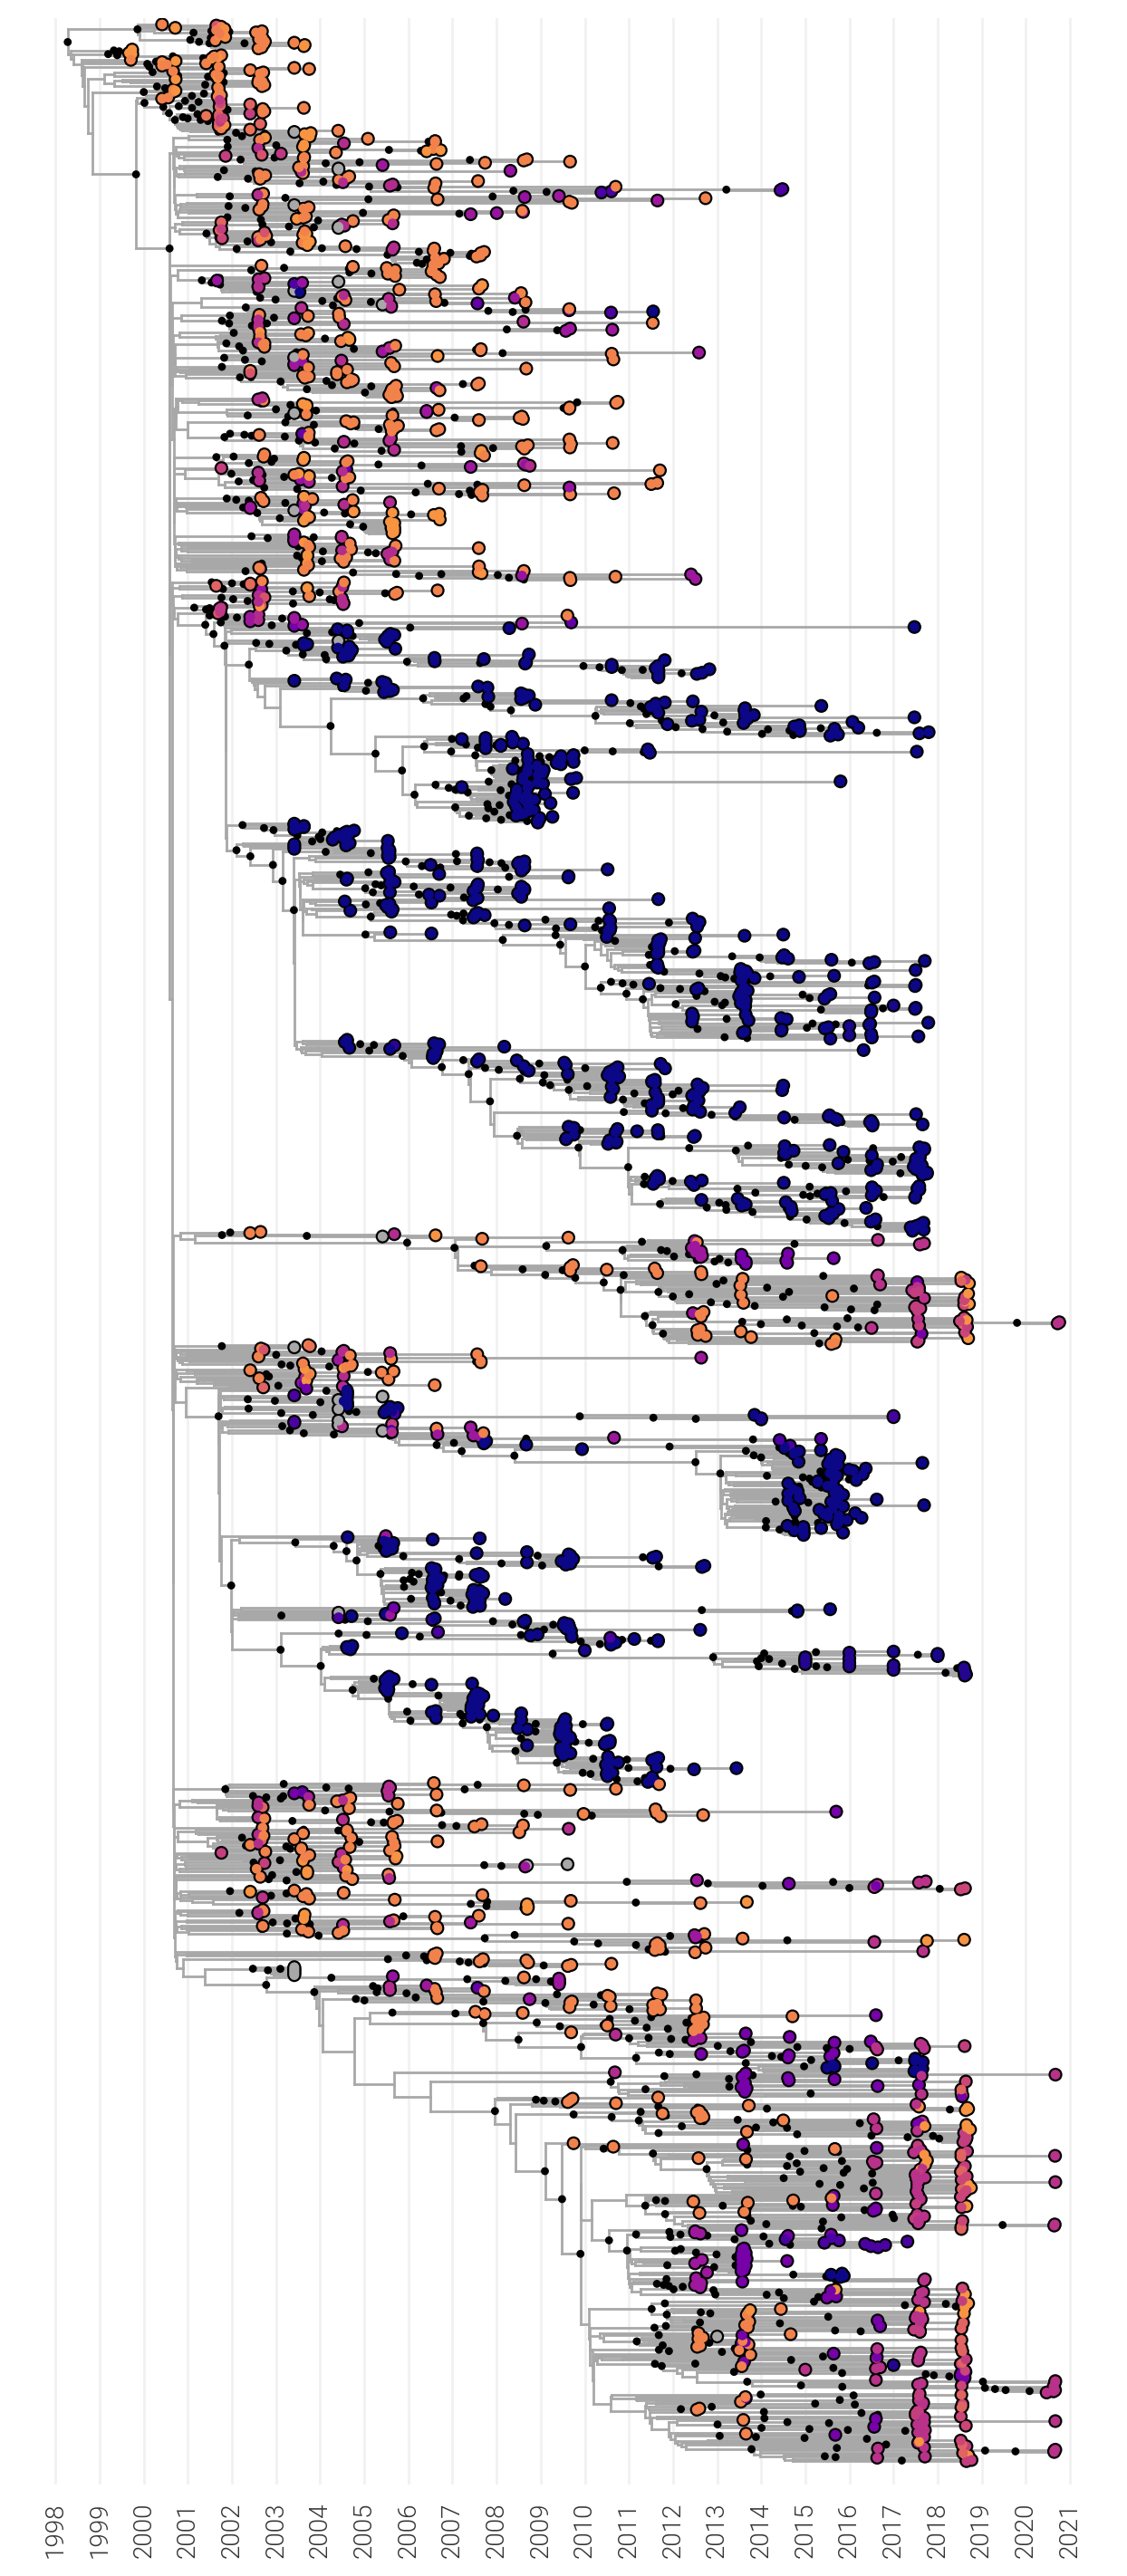

In [5]:
fig, ax = plt.subplots( dpi=200, figsize=(6.5,14.5) )
x_attr = lambda k: mdates.date2num( dec_to_date( k.absoluteTime ) )
c_func = lambda k: state_dict.get( k.name.split( "|" )[2].split( "-" )[0], state_dict["Other"] )
t.plotTree( ax, x_attr=x_attr, colour=state_dict["Other"], linewidth=1 )
t.plotPoints( ax, x_attr=x_attr, size=15, colour=c_func, zorder=100 )
t.plotPoints( ax, x_attr=x_attr, target=lambda k : k.is_node() & (k.traits.get( "posterior", 0) > 0.5), color=COLOR, size=5 )

ax.set_yticks([])
ax.set_yticklabels([])
ax.tick_params( axis="x", bottom=False, which="both", labelbottom=True, rotation=90, labelsize=10 )
ax.xaxis.set_major_locator( mdates.YearLocator() )
ax.xaxis.set_major_formatter( mdates.DateFormatter( '%Y' ) )

ax.grid( which="both", axis="x", linewidth=1, color="#F1F1F1", zorder=1 )
[ax.spines[loc].set_visible(False) for loc in ax.spines]
ax.set_ylim(-20,t.ySpan+5)

plt.tight_layout()
plt.savefig( snakemake.output.tree_figure )
plt.show()

Plot the map legend

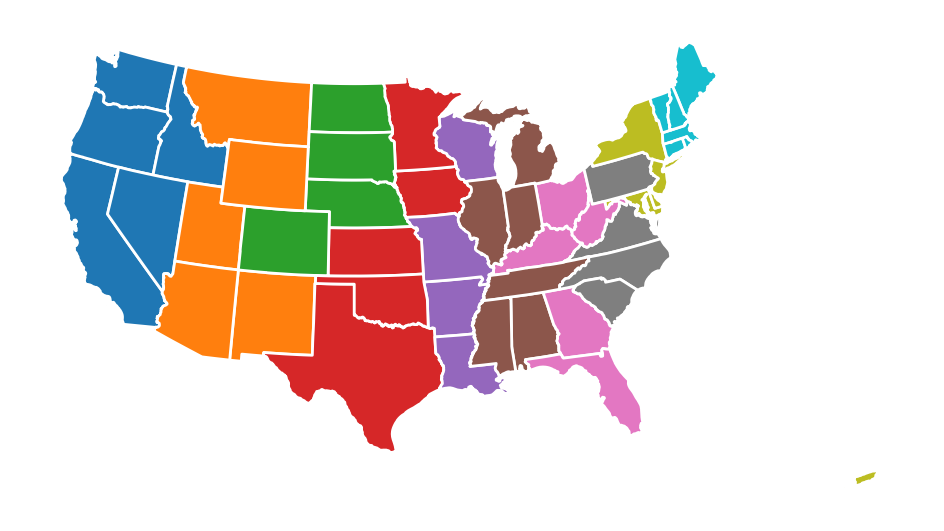

In [6]:
plt.figure( dpi=200, figsize=(5,4) )
ax = plt.subplot()
us.plot( ax=ax, column="color_hex", zorder=1, edgecolor="white", linewidth=1 )
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
[ax.spines[j].set_visible(False) for j in ax.spines]

plt.tight_layout()
plt.savefig( snakemake.output.tree_legend )
plt.show()